<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 137 (delta 64), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (137/137), 1.41 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (64/64), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [32]:
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

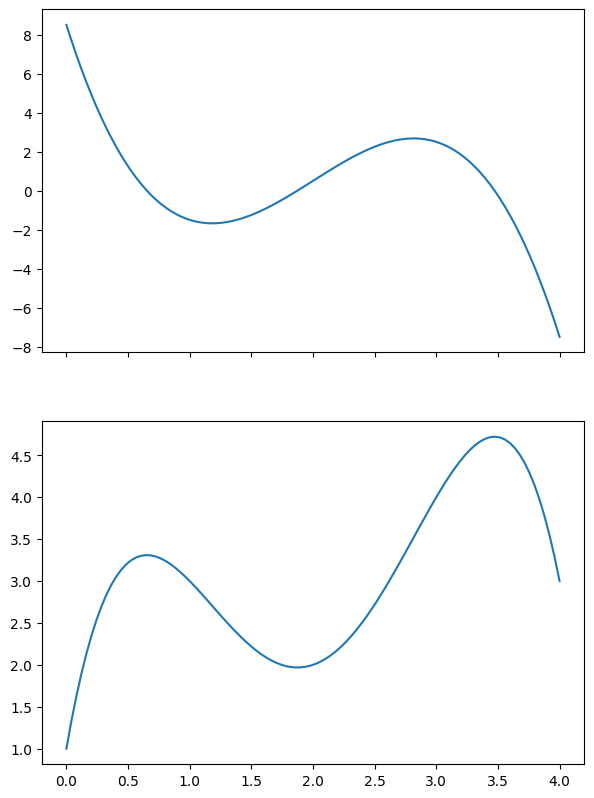

In [31]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0,4,100)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(7,10),dpi=100)
ax1.plot(xs,[f(x) for x in xs])
ax2.plot(xs,[sol(x) for x in xs])
fig.show()

Implementación *stand-alone*

In [ ]:
import numpy as np

a = 0
b = 4

h = 0.5

x0 = 0
y0 = 1

n = int((b-a)/h)

xs = np.linspace(a,b,n+1)
ys = np.zeros_like(xs)

ys[0] = y0
for j in range(1,n+1):
    ys[j] = ys[j-1] + f(xs[j-1])*h

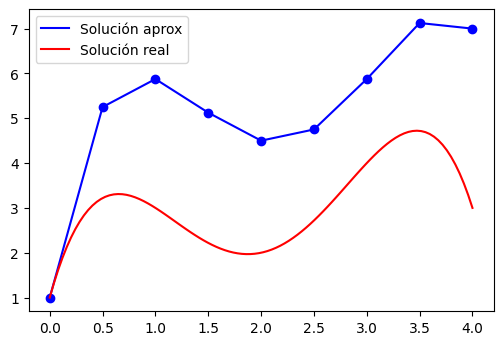

In [ ]:
import matplotlib.pyplot as plt

xaxis = np.linspace(a,b,100)

plt.figure(dpi=100)
plt.plot(xs,ys,color='blue',label='Solución aprox')
plt.scatter(xs,ys,color='blue')
plt.plot(xaxis,[sol(x) for x in xaxis],color='red',label='Solución real')
plt.legend(loc='best')
plt.show()

Como clase

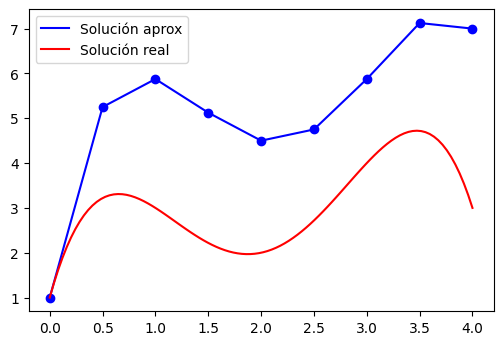

In [2]:
from edo import EulerEDO

f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0)
solver.plot(plot_nodes=True)

In [5]:
from edo import print_table

valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)


x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	5.25	3.219	-0.631
1.0	5.875	3.0	-0.958
1.5	5.125	2.219	-1.31
2.0	4.5	2.0	-1.25
2.5	4.75	2.719	-0.747
3.0	5.875	4.0	-0.469
3.5	7.125	4.719	-0.51
4.0	7.0	3.0	-1.333


In [5]:
sol(0.5)

3.21875

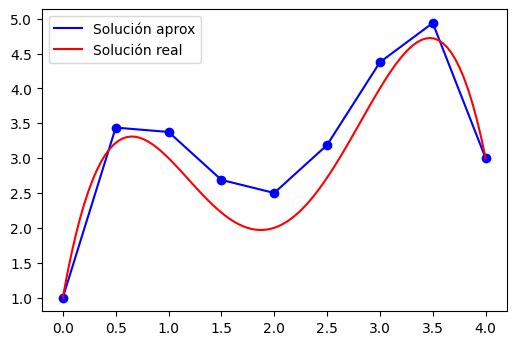

In [6]:
from edo import EulerEDO

f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0)
solver.plot(plot_nodes=True)

In [7]:
valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	3.438	3.219	-0.068
1.0	3.375	3.0	-0.125
1.5	2.688	2.219	-0.211
2.0	2.5	2.0	-0.25
2.5	3.188	2.719	-0.172
3.0	4.375	4.0	-0.094
3.5	4.938	4.719	-0.046
4.0	3.0	3.0	0.0


# Ejemplo con función que depende de x y y

In [41]:
from edo import EulerEDO, load_example

example = load_example(4)

a = example['a']
b = example['b']
h = example['h']
f = example['f']
sol = example['sol']
x0 = example['x0']
y0 = example['y0']    

print(f"a={a}, b={b}, h={h}")
print(f"f(x,y)={example['function_f']}")

a=1, b=2.25, h=0.25
f(x,y)=y*x**3-y


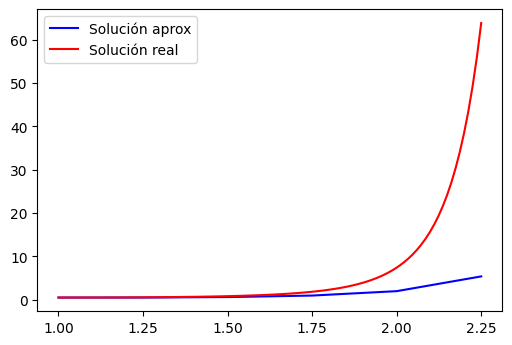

x	y	y real	error rel
1.0	0.472	0.472	0.0
1.25	0.472	0.527	0.104
1.5	0.585	0.791	0.261
1.75	0.932	1.813	0.486
2.0	1.948	7.389	0.736
2.25	5.358	63.894	0.916


In [42]:
solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Euler')
solver.plot(plot_nodes=False)
solver.table()

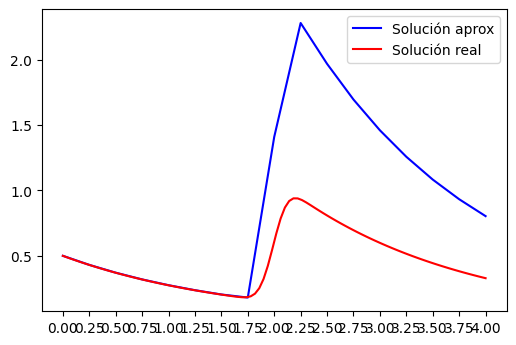

x	y	y real	error rel
0.0	0.5	0.5	0.0
0.25	0.431	0.43	-0.001
0.5	0.371	0.37	-0.001
0.75	0.319	0.319	-0.002
1.0	0.275	0.274	-0.003
1.25	0.237	0.236	-0.003
1.5	0.204	0.203	-0.004
1.75	0.181	0.184	0.02
2.0	1.41	0.609	-1.314
2.25	2.281	0.931	-1.449
2.5	1.969	0.809	-1.435
2.75	1.696	0.696	-1.436
3.0	1.46	0.599	-1.438
3.25	1.258	0.516	-1.44
3.5	1.083	0.444	-1.441
3.75	0.933	0.382	-1.443
4.0	0.804	0.329	-1.444


In [3]:
solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Heun')
solver.plot(plot_nodes=False)
solver.table()

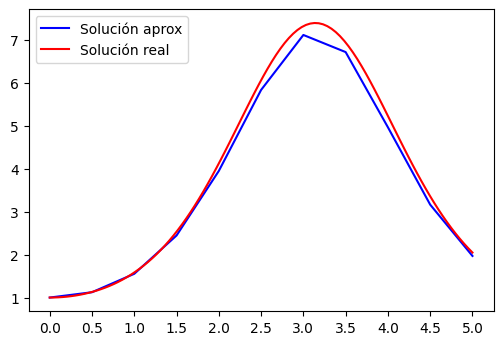

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	1.124	1.13	0.006
1.0	1.553	1.584	0.02
1.5	2.444	2.533	0.035
2.0	3.947	4.121	0.042
2.5	5.831	6.057	0.037
3.0	7.11	7.315	0.028
3.5	6.712	6.934	0.032
4.0	4.962	5.226	0.05
4.5	3.162	3.356	0.058
5.0	1.968	2.047	0.039


In [34]:
solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Mid')
solver.plot(plot_nodes=False)
solver.table()

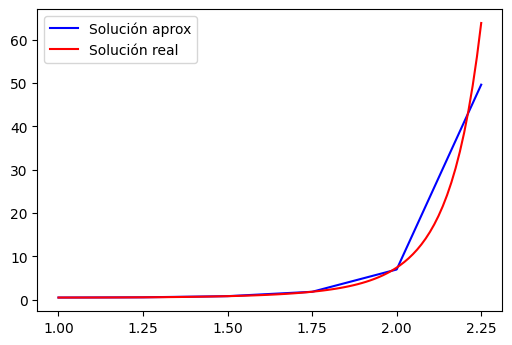

x	y	y real	error rel
1.0	0.472	0.472	0.0
1.25	0.528	0.527	-0.002
1.5	0.794	0.791	-0.003
1.75	1.803	1.813	0.005
2.0	6.952	7.389	0.059
2.25	49.648	63.894	0.223


In [43]:
from edo import RungeKutta

solver = RungeKutta(f=example['f'],
                    sol=example['sol'],
                    order=3)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
solver.table()

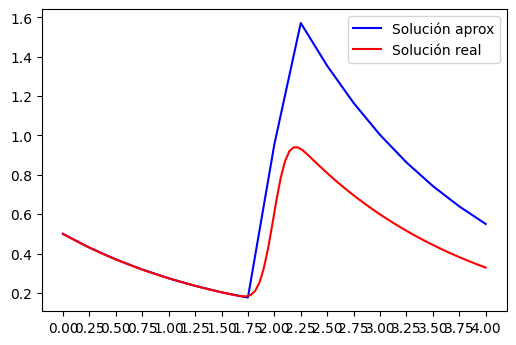

x	y	y real	error rel
0.0	0.5	0.5	0.0
0.25	0.43	0.43	0.0
0.5	0.37	0.37	0.0
0.75	0.319	0.319	0.0
1.0	0.274	0.274	0.0
1.25	0.236	0.236	0.0
1.5	0.203	0.203	0.0
1.75	0.177	0.184	0.042
2.0	0.954	0.609	-0.567
2.25	1.571	0.931	-0.687
2.5	1.354	0.809	-0.674
2.75	1.165	0.696	-0.674
3.0	1.003	0.599	-0.674
3.25	0.863	0.516	-0.674
3.5	0.743	0.444	-0.674
3.75	0.639	0.382	-0.674
4.0	0.55	0.329	-0.674


In [7]:
from edo import RungeKutta

solver = RungeKutta(f=example['f'],
                    sol=example['sol'],
                    order=3)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
solver.table()

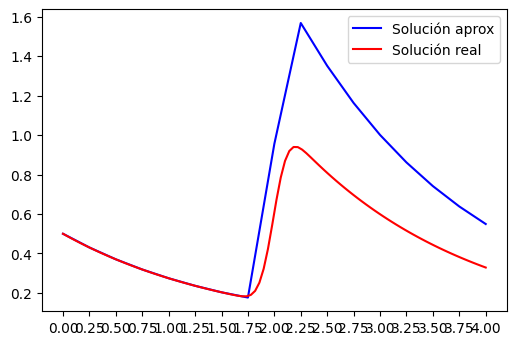

x	y	y real	error rel
0.0	0.5	0.5	0.0
0.25	0.43	0.43	-0.0
0.5	0.37	0.37	-0.0
0.75	0.319	0.319	-0.0
1.0	0.274	0.274	-0.0
1.25	0.236	0.236	-0.0
1.5	0.203	0.203	0.0
1.75	0.177	0.184	0.041
2.0	0.956	0.609	-0.569
2.25	1.568	0.931	-0.684
2.5	1.351	0.809	-0.671
2.75	1.163	0.696	-0.671
3.0	1.001	0.599	-0.671
3.25	0.862	0.516	-0.671
3.5	0.742	0.444	-0.671
3.75	0.638	0.382	-0.671
4.0	0.549	0.329	-0.671


In [8]:
from edo import RungeKutta

solver = RungeKutta(f=example['f'],
                    sol=example['sol'],
                    order=4)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
solver.table()